# Programming Assignment - SVD and PCA
---

ANDREA GIRALDO-PUERTA; HW3;

# Import required packages

## Question 1
---
In designing a movie recommendation system, one creates a rating matrix $R\in\mathbb{R}^{m \times n}$ for $m$ users and $n$ movies. The entries $R_{ij}$ gives the rating of a movie (1-5) in the $j$-th column by a user in the $i$-th row. The rating matrix is generally quite sparse. The missing entries are replaced by $0$ as a starter. Answer the following question for the MovieLens dataset available below.
<a href="https://grouplens.org/datasets/movielens/">MovieLens Dataset</a>

Read Sections 2 and 3 for application of SVD in recommendation systems of this [paper by Sarvar et. al.](http://robotics.stanford.edu/~ronnyk/WEBKDD2000/papers/sarwar.pdf).

A. Load the dataset using pandas and create the rating matrix $R$.

B. Replace missing entries in $R$ by the average movie ratings column-wise. Create $R_{norm}$ by subtracting the user average for every row.

C. Perform the SVD of $R_{norm}$ as $R_{norm} = U S V^T$. Perform low-rank approximation of $R_{norm}$ by using $k=100$.

D. By using the above low-rank reconstruction, the predicted rating of movie $j$ by user $i$ could be given by
$$\Large
R_{ij}\approx \mu_i + [U_{(k)}S^{1/2}_{(k)}]_{i:} [S^{1/2}_{(k)}V^T_{(k)}]_{:j}
$$
where $\mu_i$ is the average of ratings by user $i$.

E. Make a tabular comparison of the actual ratings and predicted ratings for some randomly selected users and movies.

In [7]:
# Your code comes here
import pandas as pd
import numpy as np
from scipy.linalg import svd
import zipfile
import random

with zipfile.ZipFile("ml-latest-small.zip", 'r') as zip_ref:
    print(zip_ref.namelist()) 

with zipfile.ZipFile("ml-latest-small.zip", 'r') as zip_ref:
    with zip_ref.open("ml-latest-small/ratings.csv") as file:
        ratings = pd.read_csv(file)
        print(ratings.head())

R = ratings.pivot_table(index='userId', columns='movieId', values='rating', fill_value=0)

print(R.head())

R_filled = R.replace(0, np.nan) 
R_mean_filled = R_filled.apply(lambda x: x.fillna(x.mean()), axis=0)  
user_means = R_mean_filled.mean(axis=1).to_numpy().reshape(-1,1)
R_norm = R_mean_filled-user_means

print(R_norm.head())

U, S, Vt = svd(R_norm, full_matrices=False)

k = 100
U_k = U[:, :k]
S_k = np.diag(S[:k])
Vt_k = Vt[:k, :]

print("Shapes of U_k, S_k, Vt_k:", U_k.shape, S_k.shape, Vt_k.shape)

S_k_sqrt = np.sqrt(S_k)
reconstructed_R_norm = np.dot(np.dot(U_k, S_k_sqrt), np.dot(S_k_sqrt, Vt_k))
predicted_ratings = reconstructed_R_norm + user_means

predicted_df = pd.DataFrame(predicted_ratings, index=R.index, columns=R.columns)
print(f'predicament:')
print(predicted_df.head())

user_movie_pairs = [(random.choice(R.index), random.choice(R.columns)) for _ in range(5)]

comparison = []
for user, movie in user_movie_pairs:
    actual = R.at[user, movie]
    predicted = predicted_df.at[user, movie]
    comparison.append({'User': user, 'Movie': movie, 'Actual Rating': actual, 'Predicted Rating': predicted})

comparison_df = pd.DataFrame(comparison)
print(f"comparison of actual and predicted ratings:")
print(comparison_df)



['ml-latest-small/', 'ml-latest-small/links.csv', 'ml-latest-small/tags.csv', 'ml-latest-small/ratings.csv', 'ml-latest-small/README.txt', 'ml-latest-small/movies.csv']
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     0.0     4.0     0.0     0.0     4.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5           4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581 

## Question 2
---
Use the Python code for image compression to compress the national flags of different countries of your choice. The smallest $k$ value which provides a decent quality could approximately give the numerical rank of the flag. Pick up any 5 national flags and arrange them in the order of decreasing numerical rank. 

Original order of the national flags tensor:
Australia: (1280, 2560, 3)


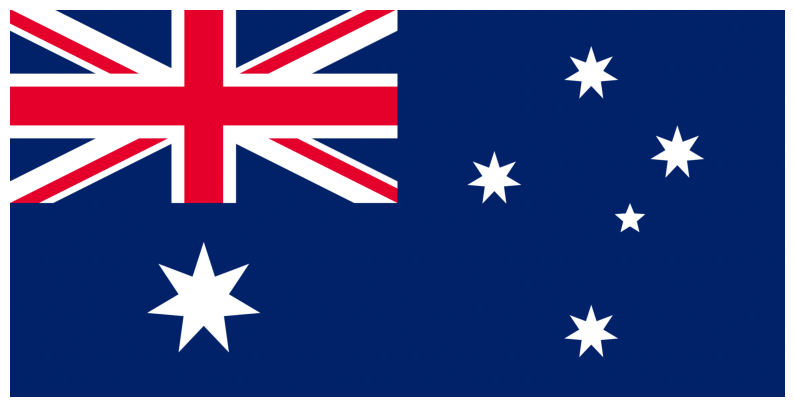

UK: (1280, 2560, 3)


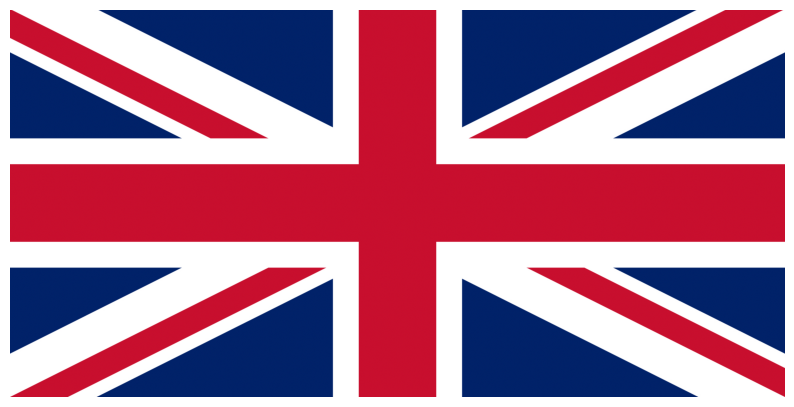

Cuba: (1280, 2560, 3)


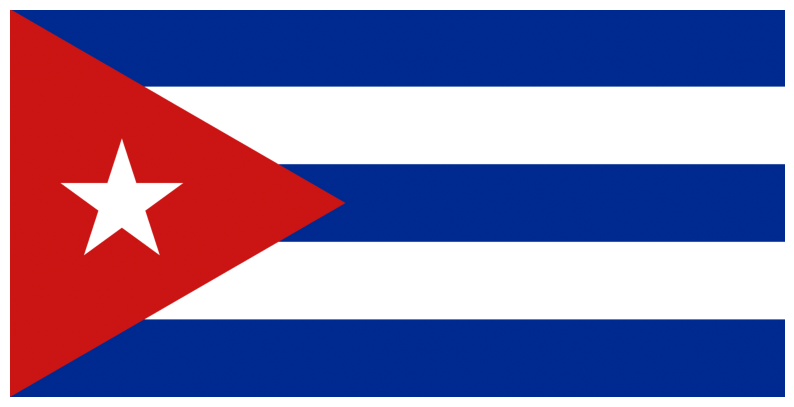

Srilanka: (1280, 2560, 3)


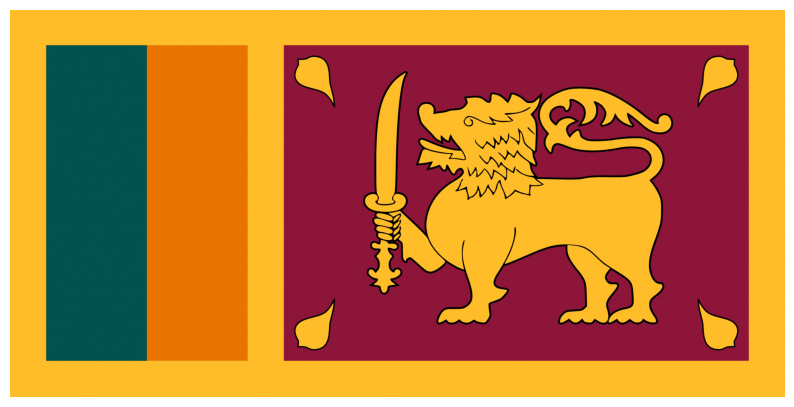

Armenia: (1280, 2560, 3)


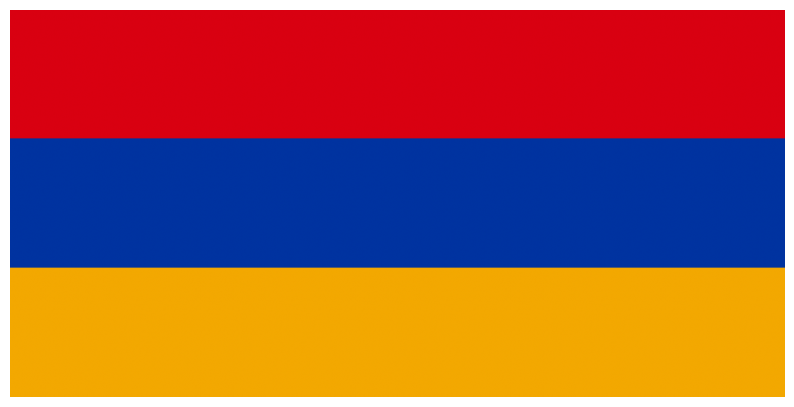

k = 1, Error Norm = 675.0000978437067, Ratio = 0.5067899816174
k = 2, Error Norm = 577.9915492711152, Ratio = 0.5776723239720164
k = 3, Error Norm = 520.2949049411866, Ratio = 0.6198301889878632
Rank found: 3
Australia: Numerical Rank = 3
k = 1, Error Norm = 952.4345350199671, Ratio = 0.5421356886277627
k = 2, Error Norm = 790.4972609182082, Ratio = 0.6199838721677944
Rank found: 2
UK: Numerical Rank = 2
k = 1, Error Norm = 617.774611973789, Ratio = 0.6927051473134089
Rank found: 1
Cuba: Numerical Rank = 1
k = 1, Error Norm = 553.4844546158499, Ratio = 0.6855469720270226
Rank found: 1
Srilanka: Numerical Rank = 1
k = 1, Error Norm = 8.10548674412295e-11, Ratio = 0.999999999999951
Rank found: 1
Armenia: Numerical Rank = 1

Flags in order of decreasing numerical rank:
Australia: Rank = 3
UK: Rank = 2
Cuba: Rank = 1
Srilanka: Rank = 1
Armenia: Rank = 1

Compressed version of Australia with k = 3:


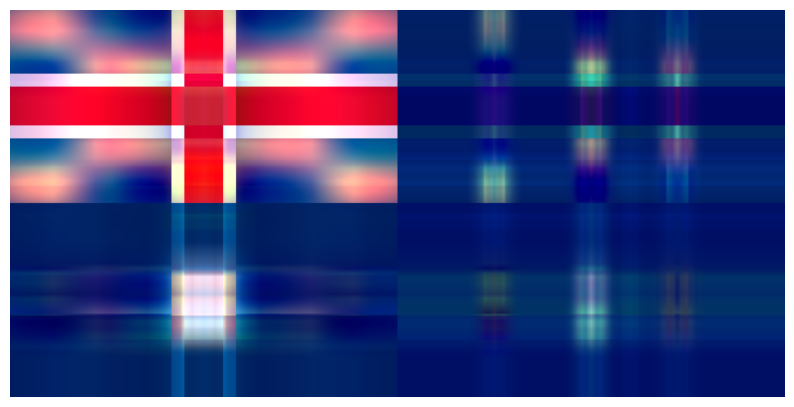


Compressed version of UK with k = 2:


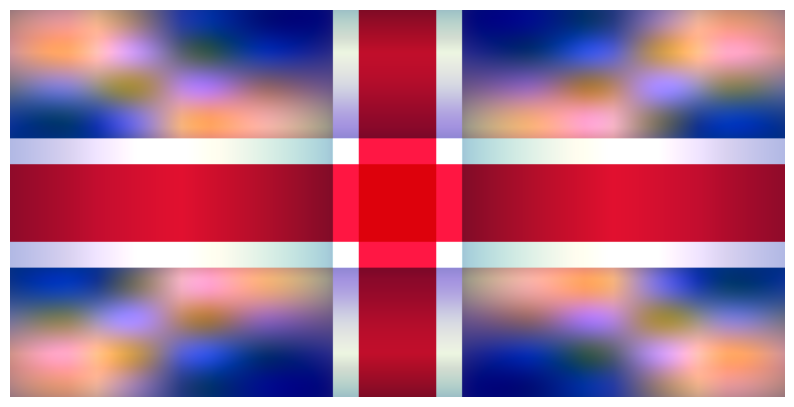


Compressed version of Cuba with k = 1:


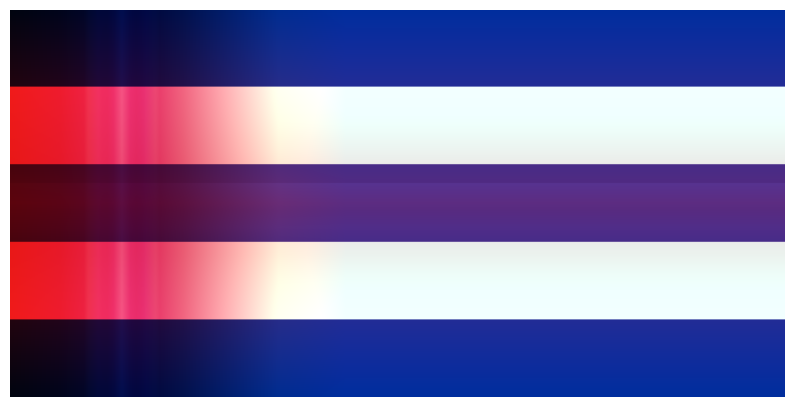


Compressed version of Srilanka with k = 1:


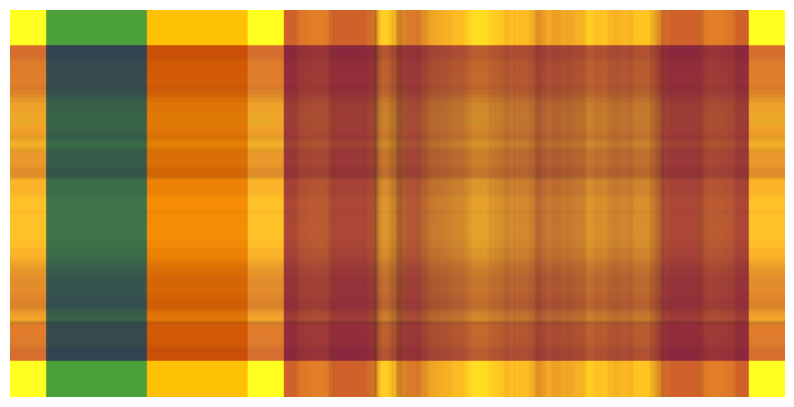


Compressed version of Armenia with k = 1:


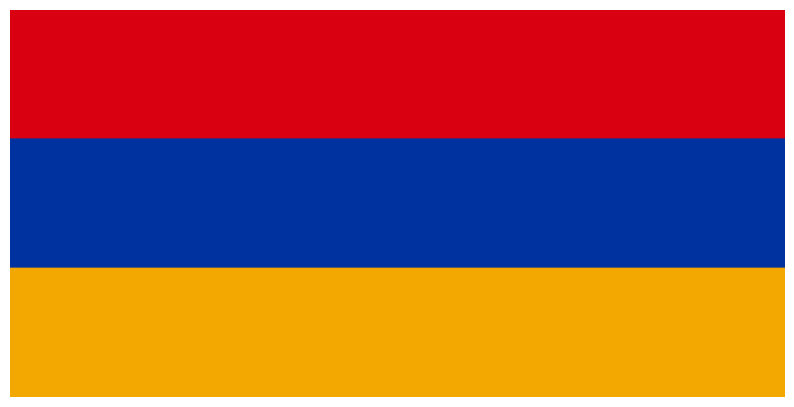

In [5]:
# Your code comes here
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def svd_decomposition(img):
    U0, S0, V0 = np.linalg.svd(img[..., 0], full_matrices=False)
    U1, S1, V1 = np.linalg.svd(img[..., 1], full_matrices=False)
    U2, S2, V2 = np.linalg.svd(img[..., 2], full_matrices=False)
    return (U0, S0, V0), (U1, S1, V1), (U2, S2, V2)

def compress_flag(U, S, V, k):

    return np.dot(U[:, :k], np.diag(S[:k]) @ V[:k, :])


def find_numerical_rank(img, threshold=0.60):
    original_norm = np.linalg.norm(img) 
    
    (U0, S0, V0), (U1, S1, V1), (U2, S2, V2) = svd_decomposition(img)
    
    for k in range(1, min(img.shape[0], img.shape[1])):
        compressed = np.zeros_like(img)
        compressed[..., 0] = compress_flag(U0, S0, V0, k)
        compressed[..., 1] = compress_flag(U1, S1, V1, k)
        compressed[..., 2] = compress_flag(U2, S2, V2, k)
        error_norm = np.linalg.norm(img - compressed)
       
        ratio = 1 - (error_norm / original_norm)
        print(f"k = {k}, Error Norm = {error_norm}, Ratio = {ratio}")

        if ratio >= threshold:
            print(f"Rank found: {k}")
            return k

    return min(img.shape[0], img.shape[1])
        
def display_image(img, dim=(10, 20)):
    plt.figure(figsize=dim)
    plt.axis('off')
    plt.imshow(img)
    plt.show()

flags = {
    "Australia": mpimg.imread("Australia.JPG")/255.0,
    "UK": mpimg.imread("UK.JPG")/255.0,
    "Cuba": mpimg.imread("Cuba.JPG")/255.0,
    "Srilanka": mpimg.imread("Srilanka.JPG")/255.0,
    "Armenia": mpimg.imread("Armenia.JPG")/255.0
}

print("Original order of the national flags tensor:")
for name, img in flags.items():
    print(f"{name}: {img.shape}")
    display_image(img, dim=(10, 20))

ranks = {}
for name, img in flags.items():
    rank = find_numerical_rank(img)
    ranks[name] = rank
    print(f"{name}: Numerical Rank = {rank}")

sorted_flags = sorted(ranks.items(), key=lambda x: x[1], reverse=True)

print("\nFlags in order of decreasing numerical rank:")
for name, rank in sorted_flags:
    print(f"{name}: Rank = {rank}")

for name, img in flags.items():
    k = ranks[name]
    (U0, S0, V0), (U1, S1, V1), (U2, S2, V2) = svd_decomposition(img)
    compressed = np.zeros_like(img)
    compressed[..., 0] = compress_flag(U0, S0, V0, k)
    compressed[..., 1] = compress_flag(U1, S1, V1, k)
    compressed[..., 2] = compress_flag(U2, S2, V2, k)

    compressed = np.clip(compressed, 0, 1)
    
    print(f"\nCompressed version of {name} with k = {k}:")
    display_image(compressed, dim=(10, 20))

## Question 3
---
(An open ended asignment) Visit the University of California open source [data repository](https://archive.ics.uci.edu/datasets). Pick up an appropriate dataset of you choice preferably one with default-task 'classification'. Follow the examples provided during the class to get some insight from the data that you have selected.  In the process of doing so utilize any tools and techniques at your disposal including (and not limited to)...

>- Observation of covariance and correlation between different features (columns, explanatory variables).

>- Distribution of different features and observations.

>- Utilize PCA to describe low-dimension representations.

>- Use plots such as Scree-plot, Bi-plot etc.

>- Discuss and clustering behaviours around the classes exposed by the first few PCs.

>- Anything else that you find interesting.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

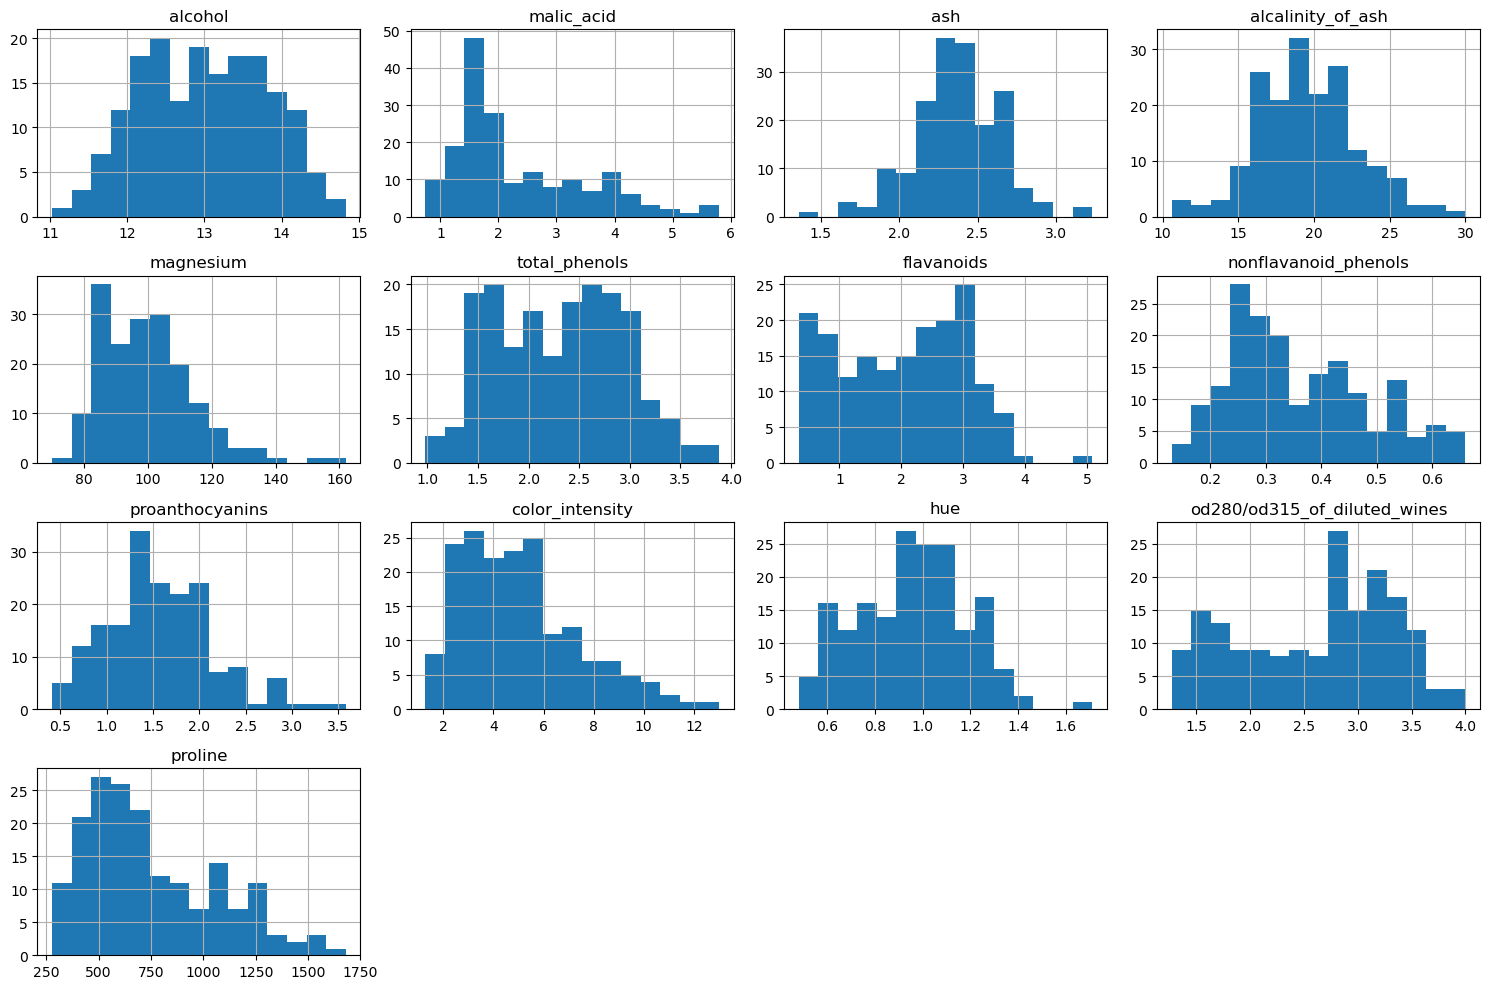

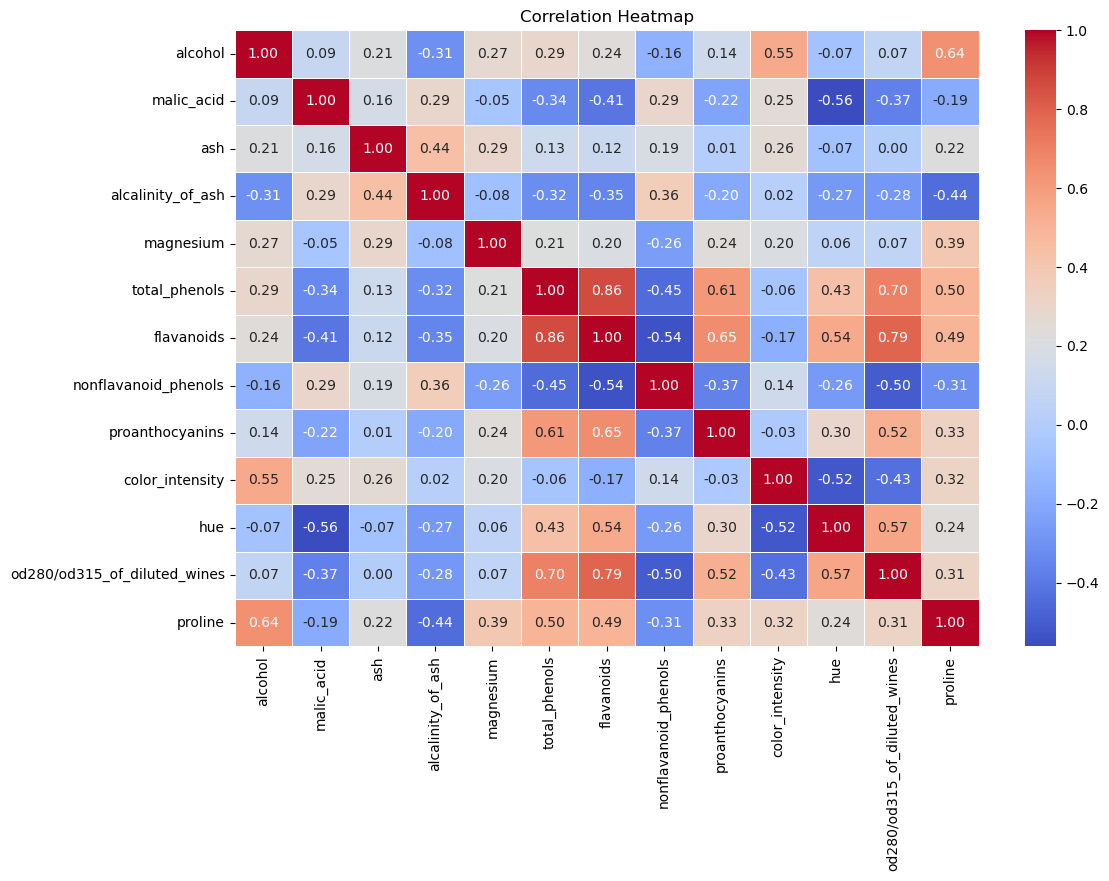

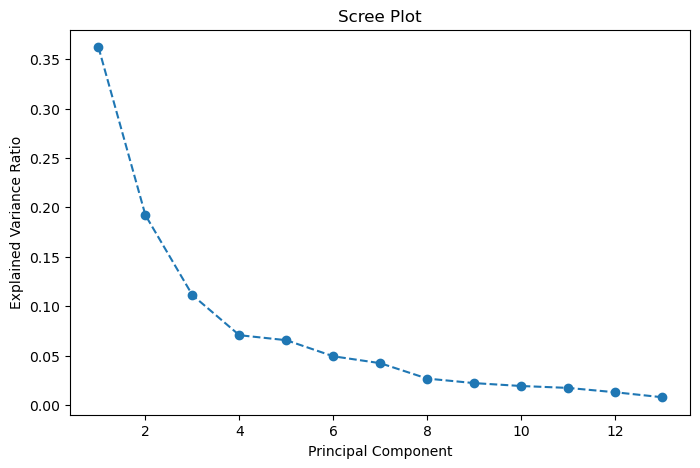

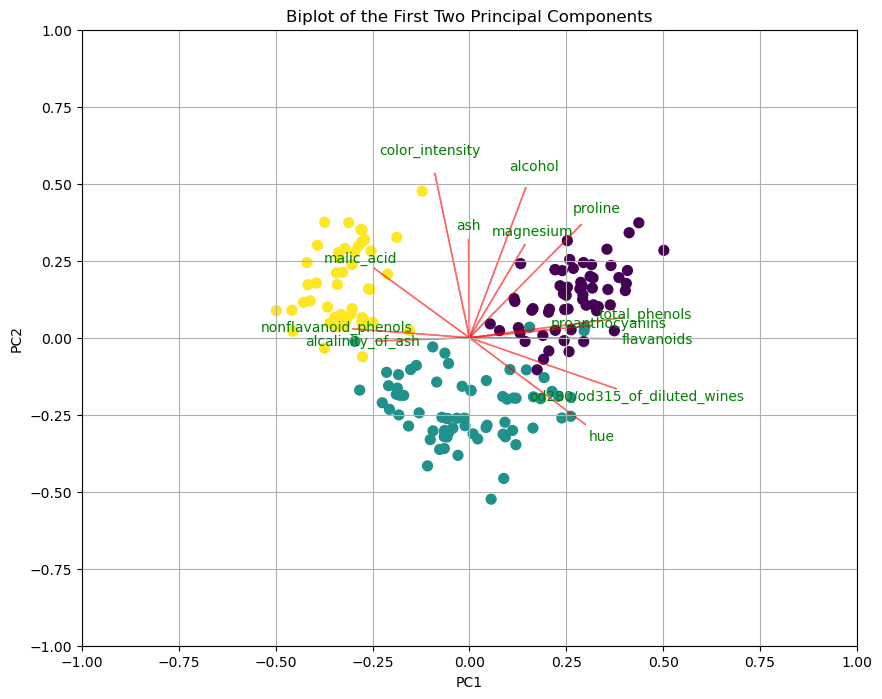

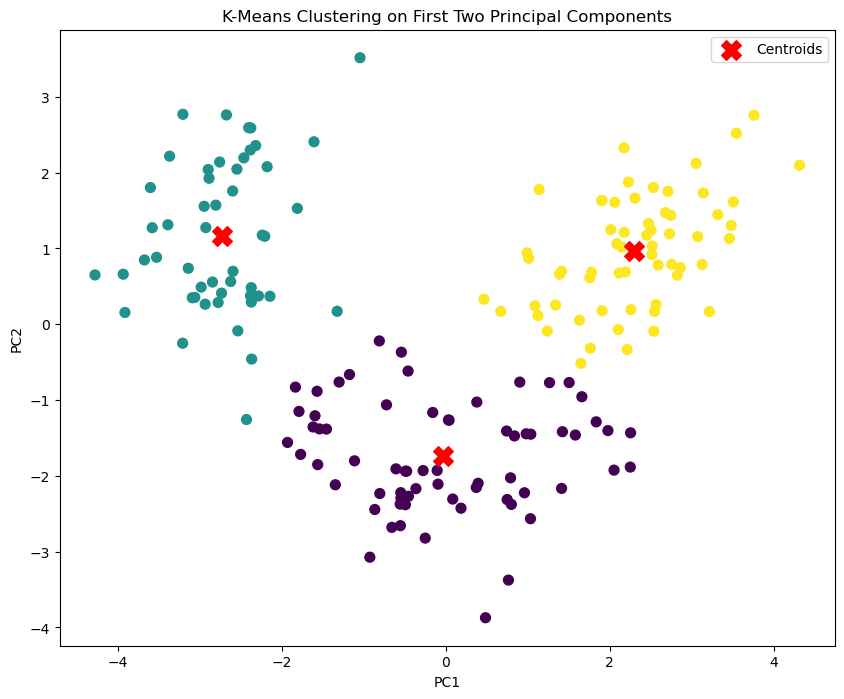

In [1]:
# Your code comes here
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine

wine = load_wine()

df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)

print(df_wine.info())
print("\nFirst few rows of the dataset:")
print(df_wine.head())
print("\nMissing Values:\n", df_wine.isnull().sum())
print("\nSummary Statistics:\n", df_wine.describe())

df_wine.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()

correlation_matrix = df_wine.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_wine)

pca = PCA(n_components=df_wine.shape[1])
data_pca = pca.fit_transform(data_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

def myplot2(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())

    plt.figure(figsize=(10, 8))
    plt.scatter(xs * scalex, ys * scaley, c=wine.target, cmap='viridis', s=50)

    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, f"Var{i+1}", 
                     color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], 
                     color='g', ha='center', va='center')

    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Biplot of the First Two Principal Components")
    plt.grid()

myplot2(
    score=data_pca[:, :2], 
    coeff=np.transpose(pca.components_[:2, :]), 
    labels=df_wine.columns
)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(data_pca[:, :2])

plt.figure(figsize=(10, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering on First Two Principal Components')
plt.legend()
plt.show()
